# Lab 4

# A Support Vector Machine

Лекц 8 дээр бид Дэмжигч вектор машины аргыг үзсэн ба энэхүү лабораторийн ажилаар уг аргыг Python хэл дээр өөрсдийн өгөгдөл ашиглан туршин үзэж стандарт сангын аргатай харьцуулах болно. Илүү ихийг мэдэхийг хүсвэл дараах судалгааны ажилуудыг санал болгож байна. Үүнд:

**Schölkopf & Smola** (2002). Learning with Kernels. Support Vector Machines, Regularization, Optimization, and Beyond.

Мөн түүнчлэн, MIT-ийн SVM-ийн математик суурьтай холбоотой товч танилцуулга байдаг.

https://www.google.de/search?client=ubuntu&channel=fs&q=svm+standford&ie=utf-8&oe=utf-8&gfe_rd=cr&ei=UfDhWM_BMunVXredsIgI#q=support+vector+machine+tutorial&channel=fs&start=10&*


In [ ]:
import numpy as np

X = np.array([
    [-2,4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],

])

y = np.array([-1,-1,1,1,1])

def svm_sgd(X, Y):

    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 100000


    for epoch in range(1,epochs):
        for i, x in enumerate(X):
            w=0 # svm ангилагчийн хэрэгжүүлэх кодыг бичнэ үү
            # svm ангилагчийн хэрэгжүүлэх кодыг бичнэ үү
            # svm ангилагчийн хэрэгжүүлэх кодыг бичнэ үү

    return w

w = svm_sgd(X,y)
print(w)

0


## Сангуудыг дуудаж оруулах

Эхлээд бид python дээр шугаман алгебр болон тооцооллын үйлдлүүдийг хялбар удирдахын тулд numpy-г ашиглах болно. Суралцах явцыг графикаар дүрсэлж харахын тулд бид matplotlib ашиглана.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Stochastic Gradient Descent

Perceptron-ийн хувьд бид python3 болон numpy ашигладаг. SVM нь Stochastic Gradient Descent алгоритм (SGD) ашиглан суралцах болно. Gradient Descent нь зардлын функцийн градиентийг дагаж функцийг багасгадаг. Дэлгэрэнгүй мэдээллийг үзнэ үү:

Wikipedia - stochastic gradient descent

### Calculating the Error

Урьдчилан таамаглах алдааг тооцоолохын тулд эхлээд svm-ийн зорилгын функцийг тодорхойлох хэрэгтэй.

#### Hinge Loss Function

Үүнийг хийхийн тулд бид алдааны функцийг тодорхойлж, таамаглалын алдааг тооцоолох хэрэгтэй. Бид перцептрондоо Hinge алдагдлыг ашиглах болно:

$$c(x, y, f(x)) = (1 - y * f(x))_+$$

$c$ алдагдлын функц юм, $x$ дээж, $y$ label, $f(x)$ таамагласан label.

Энэ нь дараахь зүйлийг хэлнэ.
$$
c(x, y, f(x))=
\begin{cases}
    0,& \text{if } y*f(x)\geq 1\\
    1-y*f(x),              & \text{else}
\end{cases}
$$

Хэрэв y ба f(x) нь тэмдэгт утгатай бол $(+1,-1)$ бодно:

хэрэв алдаа 0 бол, $y*f(x)$ нэмэх, тус тус хоёр утга ижил тэмдэгтэй байна.

алдаа $1-y*f(x)$ бол $y*f(x)$ сөрөг

#### Objective Function

Бид алдагдлын функцийг тодорхойлсон болохоор svm-ийн зорилгын функцийг тодорхойлж болно.

$$\underset{w}{min}\ \lambda\parallel w\parallel^2 + \ \sum_{i=1}^n\big(1-y_i \langle x_i,w \rangle\big)_+$$

Дээрхээс харвал svm-ийн зорилго нь хоёр нэр томъёоноос бүрдэнэ. Эхний нэр томъёо нь тогтмолжуулагч, хоёр дахь нэр томъёо нь алдагдал юм. Зохицуулагч нь ашгийн хэмжээг нэмэгдүүлэх ба алдагдлын хооронд тэнцвэржүүлдэг. Дэлгэрэнгүй мэдээлэл авахын тулд дээр дурдсан Schölkopf & Smola номын зааварчилгааг харна уу.
#### Derive the Objective Function

Энэ функцийг багасгахын тулд бидэнд энэ функцийн градиент хэрэгтэй.

Бидэнд хоёр нэр томъёо байгаа тул ялгахдаа нийлбэрийн дүрмийг ашиглан тэдгээрийг тусад нь удирдах болно.

$$
\frac{\delta}{\delta w_k} \lambda\parallel w\parallel^2 \ = 2 \lambda w_k
$$

$$
\frac{\delta}{\delta w_k} \big(1-y_i \langle x_i,w \rangle\big)_+ \ = \begin{cases}
    0,& \text{if } y_i \langle x_i,w \rangle\geq 1\\
    -y_ix_{ik},              & \text{else}
\end{cases}
$$

Энэ нь буруу ангилсан дээж байгаа гэсэн үг $x_i$, $y_i  тус  тус  \langle x_i,w \rangle \ < \ 1$, бид хоёр нэр томъёоны градиентыг ашиглан жингийн вектор w-г шинэчилнэ. Хэрэв $y_i \langle x_i,w \rangle \geq 1$. Бид w-г зохицуулагчийн градиентаар шинэчилнэ. Дүгнэж хэлэхэд svm-ийн стохастик градиент нь дараах байдалтай байна.

if $y_i⟨x_i,w⟩ < 1$:
$$
w = w + \eta (y_ix_i - 2\lambda w)
$$
else:
$$
w = w + \eta (-2\lambda w)
$$

### Data Set

Эхлээд бид label-тэй өгөгдлийн багцыг тодорхойлох хэрэгтэй.

In [ ]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

y = np.array([-1,-1,1,1,1])

Хялбар байлгахын тулд бид өгөгдлийн багцад bias нэмнэ:

In [ ]:
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],

])

y = np.array([-1,-1,1,1,1])

Энэхүү жижиг мэдээллийн багц нь $-1$ гэсэн label-тэй хоёр дээж, $+1$ гэсэн label-тэй гурван дээжийг агуулсан. Энэ нь өгөгдлийн багц нь хоёр жишээ анги агуулсан тул бид хоёртын ангиллын асуудалтай байна гэсэн үг юм. Өгөгдлийн багцыг шугаман байдлаар салгах боломжтой графикаар зурцгаая:

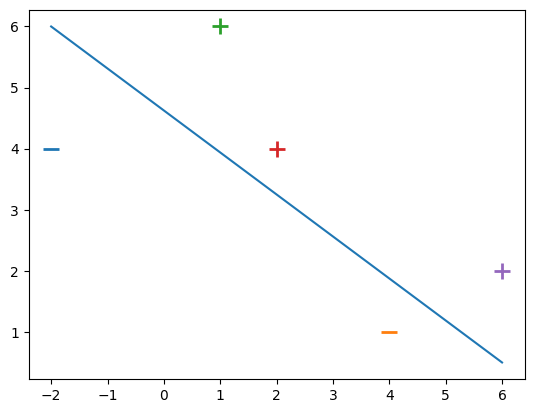

In [ ]:
for d, sample in enumerate(X):
    # Сөрөг дээжийг зурах
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Эерэг дээжийг зурах
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Хоёр ангийг тусгаарлаж болох hyperplane зурах.
plt.plot([-2,6],[6,0.5])

## Stochastic Gradient Descent

Эцэст нь бид шинэчлэх дүрмээ ашиглан SGD алгоритмаа кодлох боломжтой боллоо. Перцептронуудын зорилгын функцээс эсрэгээр бид алгоритмдаа тогтмолжуулагчийг ашигладаг. Бидэнд шугаман ялгахад хялбар жижиг өгөгдлийн багц байгаа тул энэ нь үнэндээ шаардлагагүй бөгөөд бидний стохастик градиент өгөгдлийн алгоритм үүнгүйгээр илүү хурдан нэгдэх болно.

Энгийн байлгахын тулд бид дээжийн багц дээр шугаман давталт хийнэ. Том өгөгдлийн багцын хувьд for-loop дахь давталт бүрийн үед түүврийг санамсаргүй байдлаар сонгох нь илүү дээр үр дүн гаргах юм.

In [ ]:
def svm_sgd(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 100000

    for epoch in range(1,epochs):
        for i, x in enumerate(X):
            w=0 # svm ангилагчийн хэрэгжүүлэх кодыг бичнэ үү
            # svm ангилагчийн хэрэгжүүлэх кодыг бичнэ үү
            # svm ангилагчийн хэрэгжүүлэх кодыг бичнэ үү
            # svm ангилагчийн хэрэгжүүлэх кодыг бичнэ үү
            # svm ангилагчийн хэрэгжүүлэх кодыг бичнэ үү
            # svm ангилагчийн хэрэгжүүлэх кодыг бичнэ үү


    return w

Бид sgd $ 100000$ удаа ажиллуулна. Манай сургалтын параметрийг $1$ гэж тохируулсан. Зохицуулах параметрийн хувьд бид $1/t$-ийг сонгосон тул epoch нэмэгдэх тусам энэ үзүүлэлт буурах болно.

#### Кодын тайлбар Мөр мөрөөр

line <b>2</b>: Перцептроны жингийн векторыг тэгээр эхлүүлнэ<br>
line <b>3</b>: Сурах хурдыг тохируулна уу 1<br>
line <b>4</b>: Epoch тоог тохируулна уу<br>
line <b>6</b>: Бүх өгөгдлийн багцыг n удаа давтана. Тогтворжуулах параметрийг тооцоолохдоо тэг болгон хуваахаас зайлсхийхийн тулд давталт нь $1$-ээс эхэлдэг.<br>
line <b>7</b>: Өгөгдлийн багц дахь дээж бүрийг давтана. <br>
line <b>8</b>: Буруу ангилах нөхцөл $y_i \langle x_i,w \rangle < 1$<br>
line <b>9</b>: Жинг шинэчлэх $w = w + \eta (y_ix_i - 2\lambda w)$ суралцах хурд, $\eta$ болон тогтворжуулагч зэрэг орно $\lambda$<br>
line <b>11</b>: Зөв ангилсан бол жингийн векторыг тогтворжуулагчийн нэр томъёогоор шинэчилнэ $w = w + \eta (-2\lambda w)$.<br>

### SVM-г сурцгаая!

Дараа нь бид сургалтын өгөгдөлд тохирох жингийн векторыг тооцоолохын тулд кодыг ажиллуулж болно. Буруу ангилсан дээж байгаа бол бид буруу ангилсан, зөв ангилсан дээжийн тоог хэвлэх болно.

In [ ]:
def svm_sgd_plot(X, Y):

    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 100000
    errors = []


    for epoch in range(1,epochs):
        error = 0
        for i, x in enumerate(X):
              # svm ангилагчийн хэрэгжүүлэх кодыг бичнэ үү
                error = 1
              # svm ангилагчийн хэрэгжүүлэх кодыг бичнэ үү
        errors.append(error)

    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()

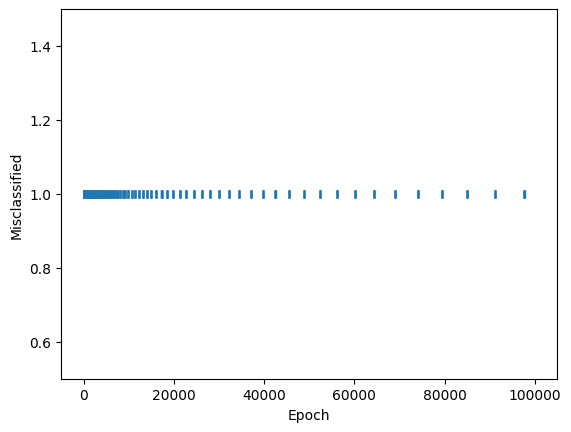

In [ ]:
svm_sgd_plot(X,y)

Дээрх графикаас svm нь олон epoch ажиллах тусам буруу ангиллыг бага гаргадаг болохыг харуулж байна. Манай перцептроноос ялгаатай нь одоогийн дээжийг зөв ангилсан ч svm нь жингийн вектороо зохицуулагчаар шинэчилдэг тул бид байнга тэг алдаа гаргадаггүй. Муу мэт харагдаж байгаа зүйл бол SVM-ийн хүч чадал бөгөөд энэ нь тогтмолжуулагчийг ашиглан хоёр ангийн хоорондох зөрүүг нэмэгдүүлэхийг үргэлж хичээдэг.

Нэгтгэн дүгнэхэд перцептрон ханасан бөгөөд тусгаарлах гипер хавтгайг олоход манай SVM нь эсрэгээрээ хоёр ангийн хоорондох зайг хамгийн их байлгах замаар гипер хавтгайг оновчтой болгохыг үргэлж эрмэлзэнэ.

SVM-ийн жингийн вектор нь 100000 epoch дараах хэвийсэн утгыг агуулсан байна $(1.56,  3.17,  11.12)$.<br>
Бид одоо дараах таамаглах функцийг гаргаж авах боломжтой.


$$
f(x) = \langle x,(1.56,3.17)\rangle - 11.12
$$

Жингийн вектор нь $(1.56,3.17)$ ба bias нь 11.12 гурав дахь бичилт юм.

## Үнэлгээ

Перцептрон зөв сурсан эсэхийг шалгахын тулд өгөгдлийн цуглуулгад байгаа дээжийг гараар ангилж үзье.

Эхний дээж $(-2, 4)$, сөрөг байх ёстой:

$$-2*1,56+4*3,17 - 11,12 = sign(-1,56) = -1$$

Хоёр дахь дээж $(4, 1)$, сөрөг байх ёстой:

$$4*1,56+1*3,17 - 11,12 = sign(-1,71) = -1$$

Гурав дахь жишээ $(1, 6)$, эерэг байх ёстой:

$$1*1,56+6*3,17-11,12 = sign(9,46) = +1$$

Дөрөв дэх жишээ $(2, 4)$, эерэг байх ёстой:

$$2*1,56+4*3,17 - 11,12 = sign(4,68) = +1$$

Тав дахь дээж $(6, 2)$, эерэг байх ёстой:

$$6*1,56+2*3,17 - 11,12 = sign(4,58) = +1$$

Бидний ангилаг сургалтанд ашиглагдаагүй өгөгдлийг хэр сайн нэгтгэж байгааг шалгахын тулд одоо хоёр туршилтын дээжийг тодорхойлъё.

Эхний туршилтын дээж $(2, 2)$, сөрөг байх ёстой:

$$2*1,56+2*3,17 - 11,12 = sign(-1,66) = -1$$

Хоёр дахь туршилтын дээж $(4, 3)$, эерэг байх ёстой:

$$4*1,56+3*3,17 - 11,12 = sign(4,63) = +1$$

Хоёр туршилтын дээжийг зөв ангилсан. Үүнийг геометрийн хувьд шалгахын тулд туршилтын дээж, гиперплан дээр дээжүүдийг хамтад нь зурж үзье.

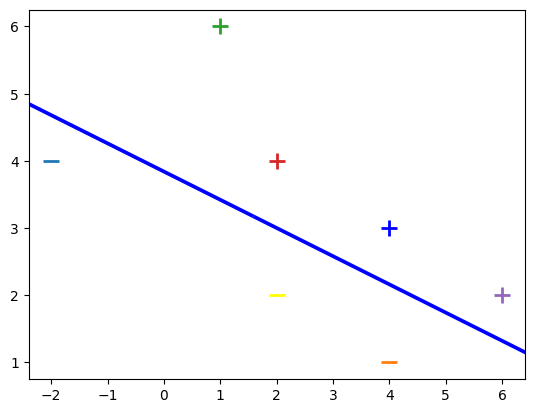

In [ ]:
w = svm_sgd(X, y)
for d, sample in enumerate(X):
    # Сөрөг дээжийг зурах
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Эерэг дээжийг зурах
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Туршилтын дээжийг нэмнэх

plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

# svm_sgd()-ээр тооцоолсон гипер хавтгайг дүрслэх
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')


In [ ]:
1/np.linalg.norm(w,2)

0.08567810847428549

# Даалгавар 1: Кодын хэсгийг нөхөх

# SVM Kernel

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors
from sklearn import linear_model, svm, discriminant_analysis, metrics
from scipy import optimize
import seaborn as sns

In [ ]:
def plotLine(ax, xRange, w, x0, label, color='grey', linestyle='-', alpha=1.):
    """ Plot a (separating) line given the normal vector (weights) and point of intercept """
    if type(x0) == int or type(x0) == float or type(x0) == np.float64:
        x0 = [0, -x0 / w[1]]
    yy = -(w[0] / w[1]) * (xRange - x0[0]) + x0[1]
    ax.plot(xRange, yy, color=color, label=label, linestyle=linestyle)

def plotSvm(X, y, support=None, w=None, intercept=0., label='Data', separatorLabel='Separator',
            ax=None, bound=[[-1., 1.], [-1., 1.]]):
    """ Plot the SVM separation, and margin """
    if ax is None:
        fig, ax = plt.subplots(1)

    im = ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, alpha=0.5, label=label)
    if support is not None:
        ax.scatter(support[:,0], support[:,1], label='Support', s=80, facecolors='none',
                   edgecolors='y', color='y')
        print("Number of support vectors = %d" % (len(support)))
    if w is not None:
        xx = np.array(bound[0])
        plotLine(ax, xx, w, intercept, separatorLabel)
        # Захын зайг дүрслэх
        if support is not None:
            signedDist = np.matmul(support, w)
            margin = np.max(signedDist) - np.min(signedDist) * np.sqrt(np.dot(w, w))
            supportMaxNeg = support[np.argmin(signedDist)]
            plotLine(ax, xx, w, supportMaxNeg, 'Margin -', linestyle='-.', alpha=0.8)
            supportMaxPos = support[np.argmax(signedDist)]
            plotLine(ax, xx, w, supportMaxPos, 'Margin +', linestyle='--', alpha=0.8)
            ax.set_title('Margin = %.3f' % (margin))
    ax.legend(loc='upper left')
    ax.grid()
    ax.set_xlim(bound[0])
    ax.set_ylim(bound[1])
    cb = plt.colorbar(im, ax=ax)
    loc = np.arange(-1,1,1)
    cb.set_ticks(loc)
    cb.set_ticklabels(['-1','1'])

In [ ]:
def plotHeatMap(X, classes, title=None, fmt='.2g', ax=None, xlabel=None, ylabel=None):
    """ Fix heatmap plot from Seaborn with pyplot 3.1.0, 3.1.1
        https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot
    """
    ax = sns.heatmap(X, xticklabels=classes, yticklabels=classes, annot=True, \
                     fmt=fmt, cmap=plt.cm.Blues, ax=ax)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)

def plotConfusionMatrix(yTrue, yEst, classes, title=None, fmt='.2g', ax=None):
    plotHeatMap(metrics.confusion_matrix(yTrue, yEst), classes, title, fmt, ax, xlabel='Estimations', \
                ylabel='True values');

In [ ]:
def generateBatchXor(n, mu=0.5, sigma=0.5):
    """ Four gaussian clouds in a Xor fashion """
    X = np.random.normal(mu, sigma, (n, 2))
    yB0 = np.random.uniform(0, 1, n) > 0.5
    yB1 = np.random.uniform(0, 1, n) > 0.5
    y0 = 2. * yB0 - 1
    y1 = 2. * yB1 - 1
    X[:,0] *= y0
    X[:,1] *= y1
    X -= X.mean(axis=0)
    return X, y0*y1

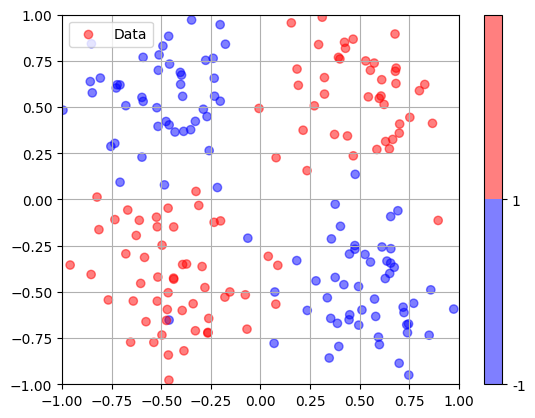

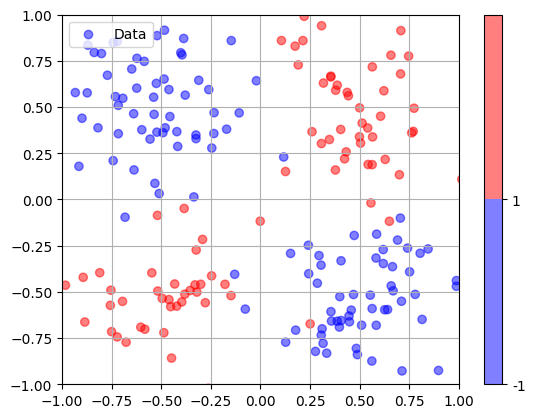

In [ ]:
colors = ['blue','red']
cmap = pltcolors.ListedColormap(colors)
nFeatures = 2
N = 100
xTrain, yTrain = generateBatchXor(2*N, sigma=0.25)
plotSvm(xTrain, yTrain)
xTest, yTest = generateBatchXor(2*N, sigma=0.25)
plotSvm(xTest, yTest)

## Kernel trick танилцуулга

Регресс гэх мэт шугаман тусгаарлагчийг ашиглах үед шугаман бус функцийг шийдвэрлэх уламжлалт арга бол анхны шинж чанаруудын зэрэгт болон үржвэрүүдийг ашиглан функцын орон зайг өргөжүүлэх явдал юм.

Шугаман арганд хязгаарлалт бий. Жишээлбэл, XOR асуудлыг зөв шийдвэрийн муж гаргаагүй байна.

SVM нь "Kernel trick" гэгддэг шинэ аргыг ашигласан.

$h(x)$ функцийг ашиглан $x$-д хувиргалтыг хэрэгжүүлцгээе.

Лагранж (Вольф) давхар (хос) асуудал дараах байдалтай байна.
$$\begin{align}
\mathcal{L}_d (\alpha)
&= \sum_{i=0}^n \alpha_i - \frac 12 \sum_{i=0}^n \sum_{k=0}^n \alpha_i \alpha_k y_i y_k h(x_i)^T h(x_k) \\
&= \sum_{i=0}^n \alpha_i - \frac 12 \sum_{i=0}^n \sum_{k=0}^n \alpha_i \alpha_k \langle y_i h(x_i), y_k  h(x_k) \rangle \\
\end{align}$$

__Subject to $\forall i\in 1..n$:__
- $0 \le \alpha_i \le C$
- $\sum_{i=0}^n \alpha_i y_i = 0$

$ w = \sum_{i=0}^n \alpha_i y_i h(x_i)$ тул таамаглах функц байна:
$$ f(x) = sign(w^T h(x) + b) = sign \left(\sum_{i=0}^n \alpha_i y_i \langle h(x_i), h(x) \rangle \right) $$

Энэ таамаглалыг дэмжих вектор болох $\alpha_i > 0$-д тооцоолох шаардлагатай.

Тохиромжтой болон таамаглал хоёулаа Kernel функц гэгддэг $K(x, x') = \langle h(x), h(x') \rangle$ дотоод бүтээгдэхүүн дээр суурилдаг. Энэ функц нь тэгш хэмтэй, хагас тодорхой байна.

Gaussian Radial Basis Function (RBF) : $K(x, x') = exp(- \gamma \Vert x - x' \Vert^2 )$

In [ ]:
class KernelSvmClassifier:

    def __init__(self, C, kernel):
        self.C = C
        self.kernel = kernel          # <---
        self.alpha = None
        self.supportVectors = None

    def fit(self, X, y):
        N = len(y)
        # --->
        # h(x) y -ийн Gram matrix
        hXX = np.apply_along_axis(lambda x1 : np.apply_along_axis(lambda x2:  self.kernel(x1, x2), 1, X),
                                  1, X)
        yp = y.reshape(-1, 1)
        GramHXy = hXX * np.matmul(yp, yp.T)
        # <---

        # Lagrange давхар асуудал
        def Ld0(G, alpha):
            return alpha.sum() - 0.5 * alpha.dot(alpha.dot(G))

        # алфа дээрх Лд-ийн хэсэгчилсэн уламжлал
        def Ld0dAlpha(G, alpha):
            return np.ones_like(alpha) - alpha.dot(G)

        # Хэлбэрийн альфа дээрх хязгаарлалт :
        # -  d - C*alpha  = 0
        # -  b - A*alpha >= 0
        A = np.vstack((-np.eye(N), np.eye(N)))             # <---
        b = np.hstack((np.zeros(N), self.C * np.ones(N)))  # <---
        constraints = ({'type': 'eq',   'fun': lambda a: np.dot(a, y),     'jac': lambda a: y},
                       {'type': 'ineq', 'fun': lambda a: b - np.dot(A, a), 'jac': lambda a: -A})

        # Эсрэгээр нь багасгах замаар дээд зэргээр нэмэгдүүлэх
        optRes = optimize.minimize(fun=lambda a: -Ld0(GramHXy, a),
                                   x0=np.ones(N),
                                   method='SLSQP',
                                   jac=lambda a: -Ld0dAlpha(GramHXy, a),
                                   constraints=constraints)
        self.alpha = optRes.x
        # --->
        epsilon = 1e-8
        supportIndices = self.alpha > epsilon
        self.supportVectors = X[supportIndices]
        self.supportAlphaY = y[supportIndices] * self.alpha[supportIndices]
        # <---

    def predict(self, X):
        """ Predict y values in {-1, 1} """
        # --->
        def predict1(x):
            x1 = np.apply_along_axis(lambda s: self.kernel(s, x), 1, self.supportVectors)
            x2 = x1 * self.supportAlphaY
            return np.sum(x2)

        d = np.apply_along_axis(predict1, 1, X)
        return 2 * (d > 0) - 1
        # <---

In [ ]:
def GRBF(x1, x2):
    diff = x1 - x2
    return np.exp(-np.dot(diff, diff) * len(x1) / 2)



model30 = KernelSvmClassifier(C=5, kernel=GRBF)
model30.fit(xTrain, yTrain)

# Даалгавар 2: нэмэлт 2 Kernel хэрэгжүүлэх аргын кодыг бичиж туршин үр дүнг харьцуулах

Number of support vectors = 37


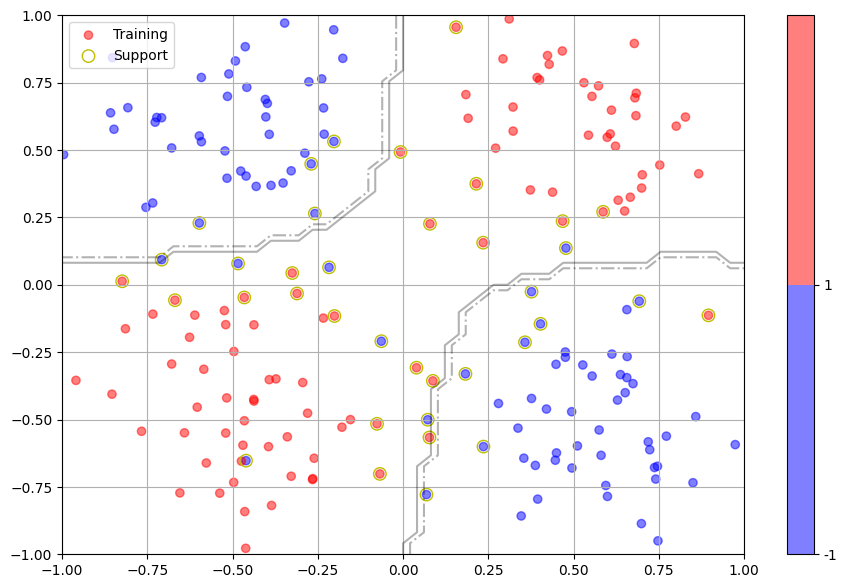

In [ ]:
fig, ax = plt.subplots(1, figsize=(11, 7))
plotSvm(xTrain, yTrain, support=model30.supportVectors, label='Training', ax=ax)

# Тооцоолол, шийдвэрийн хил хязгаар
xx = np.linspace(-1, 1, 50)
X0, X1 = np.meshgrid(xx, xx)
xy = np.vstack([X0.ravel(), X1.ravel()]).T
Y30 = model30.predict(xy).reshape(X0.shape)
ax.contour(X0, X1, Y30, colors='k', levels=[-1, 0], alpha=0.3, linestyles=['-.', '-']);

## Scikit Learn SVM with Radial basis kernel

In [ ]:
model31 = svm.SVC(kernel='rbf', C=10, gamma=1/2, shrinking=False)
model31.fit(xTrain, yTrain)

SVC(C=10, gamma=0.5, shrinking=False)

Number of support vectors = 41


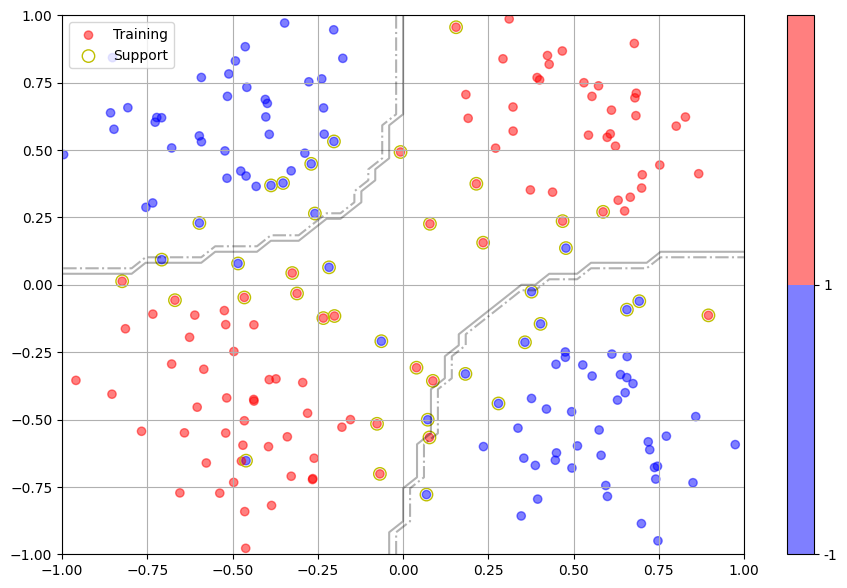

In [ ]:
fig, ax = plt.subplots(1, figsize=(11, 7))
plotSvm(xTrain, yTrain, support=model31.support_vectors_, label='Training', ax=ax)

# Тооцоолол, шийдвэрийн хил хязгаар
Y31 = model31.predict(xy).reshape(X0.shape)
ax.contour(X0, X1, Y31, colors='k', levels=[-1, 0], alpha=0.3, linestyles=['-.', '-']);

### SVM with RBF performance on XOR

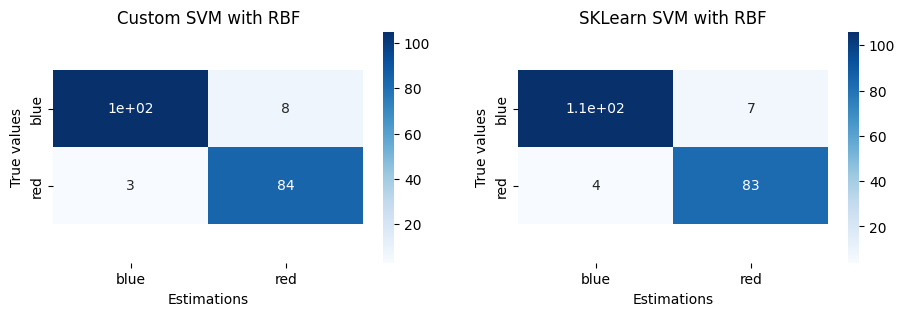

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(11, 3))
for model, ax, title in zip([model30, model31], axes, ["Custom SVM with RBF", "SKLearn SVM with RBF"]):
    yEst3 = model.predict(xTest)
    plotConfusionMatrix(yTest, yEst3, colors, title, ax=ax)

Хоёр загварын таамаглал XOR жишээн дээр бараг таарч байна.

# Даалгавар 3: Олон ангилалт SVM хэрэгжүүлэх алгоритмыг гүйцэтгэх

## Дүгнэлт

Шугаман салгах боломжгүй асуудлуудад зориулсан SVM ангилагчийн хүчийг бид харуулсан. 1990-ээд оны сүүлчээс эхлэн SVM нь олон асуудалд зориулсан машин сургалтын алгоритмын бүлийн тэргүүлэгч байсан. Энэ байдал 2010 оноос хойш бага зэрэг өөрчлөгдсөн бөгөөд гүнзгийрүүлсэн сургалт нь зарим ангиллын бодлогод илүү сайн гүйцэтгэлийг харуулсан. Гэсэн хэдий ч SVM нь олон нөхцөл байдалд илүү хүчтэй хэвээр байна. Жишээлбэл, SVM-д зориулсан сургалтын мэдээллийн хэмжээ нь гүнзгий суралцахад шаардагдах хэмжээнээс бага байна.

### Эндээс хаашаа явах вэ

- Multiclass classifier using Neural Nets in Keras ([HTML](ClassificationMulti2Features-Keras.html) / [Jupyter](ClassificationMulti2Features-Keras.ipynb))
- Multiclass classifier using Decision Trees ([HTML](ClassificationMulti2Features-Tree.html) / [Jupyter](ClassificationMulti2Features-Tree.ipynb))
- Bivariate continuous function approximation with Linear Regression ([HTML](ClassificationContinuous2Features.html) / [Jupyter](ClassificationContinuous2Features.ipynb))
- Bivariate continuous function approximation with k Nearest Neighbors ([HTML](ClassificationContinuous2Features-KNN.html) / [Jupyter](ClassificationContinuous2Features-KNN.ipynb))